### Courtesy of: 
https://www.youtube.com/watch?v=QIUxPv5PJOY

https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb


In [64]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
print('Imports done')

plt.style.use('fivethirtyeight')


Imports done


In [65]:
# Variables
stock = 'AAPL'
samples_len = 60
test_data_ratio = 0.8
predict_len = 10

In [66]:
# Get stock price data
price_data = web.DataReader(stock, data_source='yahoo', start='2012-01-01', end='2019-12-17')

# show data
price_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


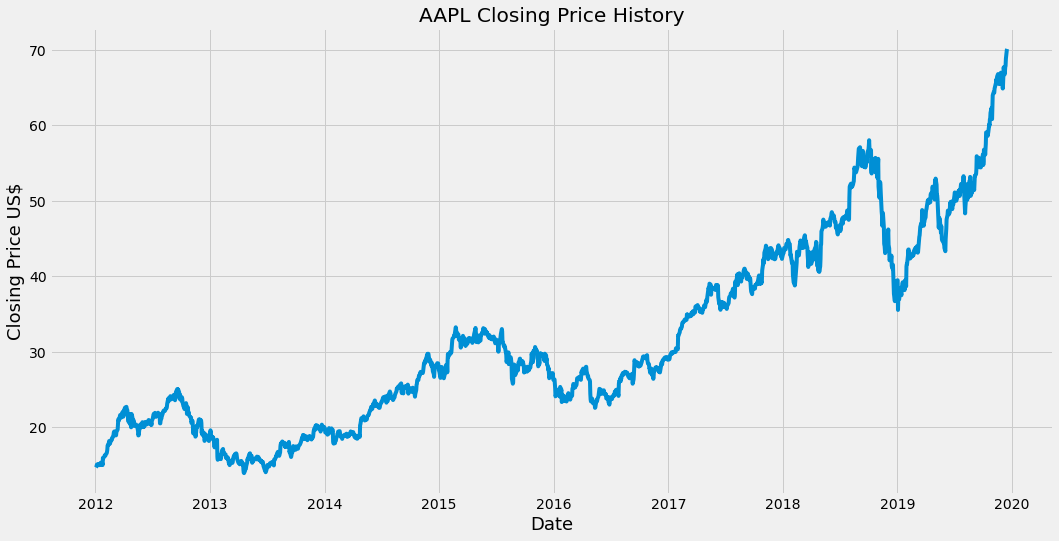

In [67]:
# Chart closing price
plt.figure(figsize=(16, 8))
plt.title(stock + ' Closing Price History')
plt.plot(price_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price US$', fontsize=18)
plt.show()

In [68]:
close_prices = price_data.filter(['Close']).values

# dataset = data.values   # convert to numpy array

training_data_len = math.ceil(len(close_prices) * test_data_ratio)

training_data_len

1603

In [69]:
# TODO: scaling should be done separately on training and test data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [70]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

# Take 60 data points and then expected result is the next value
for i in range(samples_len, len(train_data)):
    x_train.append(train_data[i-samples_len : i, 0])
    y_train.append(train_data[i, 0])

    # if i == samples_len:
    #     print(x_train)
    #     print(y_train)
    #     print()

    # if i == samples_len+1:
    #     print(x_train)
    #     print(y_train)
    #     print()

In [71]:
# Reshape data
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # needs to have 3 dimensions
x_train.shape

(1543, 60)


(1543, 60, 1)

In [72]:
# Create LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [73]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 44s 28ms/step - loss: 7.2168e-04


&lt;tensorflow.python.keras.callbacks.History at 0x1f3f7747a00&gt;

In [74]:
# Testing data set
test_data = scaled_data[training_data_len - samples_len :, :]
x_test = []
y_test = close_prices[training_data_len:, :] # predicting this

print(scaled_data.shape)
print(test_data.shape)

for i in range(samples_len, len(test_data)):
    x_test.append(test_data[i - lookback_samples : i, 0])

# x_test



(2003, 1)
(460, 1)


In [75]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # need 3 dimensions

In [76]:
# Predict on test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # scale back to real values


In [77]:
# Evaluate using Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

3.840021293846637

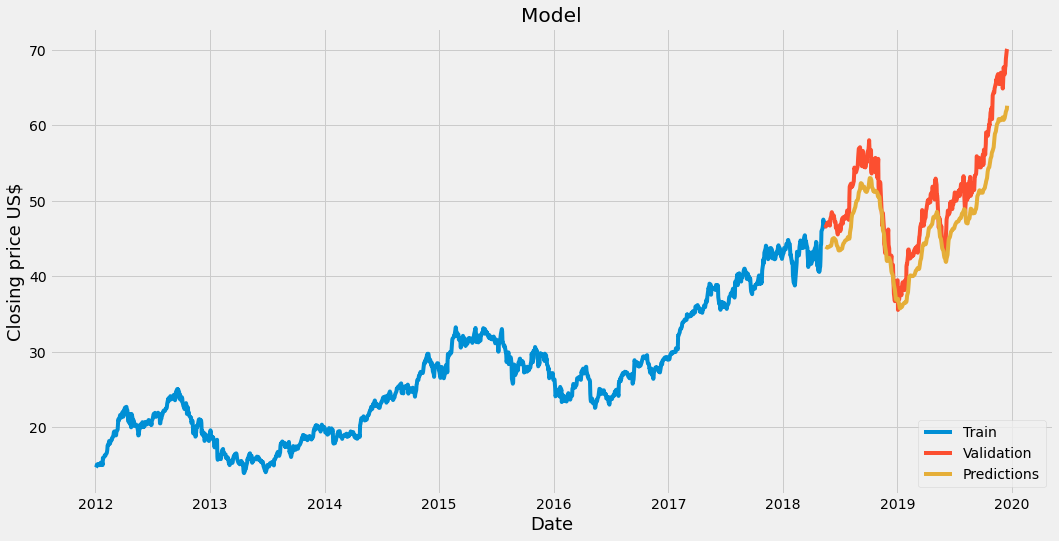

In [78]:
# Plot
train = data[: training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price US$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [79]:
# Show validation and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,43.933521
2018-05-18,46.577499,43.907700
2018-05-21,46.907501,43.839153
2018-05-22,46.790001,43.805988
2018-05-23,47.090000,43.783718
...,...,...
2019-12-11,67.692497,61.313831
2019-12-12,67.864998,61.550518
2019-12-13,68.787498,61.791569


In [81]:
# new_quote = web.DataReader(stock, data_source='yahoo', start='2012-01-01', end='2019-12-17')
# new_df = new_quote.filter(['Close'])



last_60_days = close_prices[-samples_len :]

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# using last 60 days of data, predict the next value
pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price) # Predicted price for next day out of range ie 2019-12-18
print(pred_price)

[[63.058586]]


In [82]:
actual = web.DataReader(stock, data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(actual['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64


### My Thoughts:

* Scaling was done on the full dataset before it was split, if I fix this to scale after spliting, then is this detrimental to the model? 
* Can loop through the block with "using last 60 days of data, predict the next value" and keep adding this data to the quote data to predict further out into the future 
 * At what point does this deviate too far?
 * At what point does the model need to be retrained?
* Looks like a more accurate value could be obtained by subtracting the RMSE value, as it is consistenly higher than the actual stock pred_price
* Try with other stock prices as well
* How can I automate this process for many stocks and find the best model?
* How can I automate this and use different sample lengths and find the best model?
* How can I automate this and use Australian stock prices?